<a href="https://colab.research.google.com/github/MichaelTriesCoding/Assignment-1/blob/main/assignment_1_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

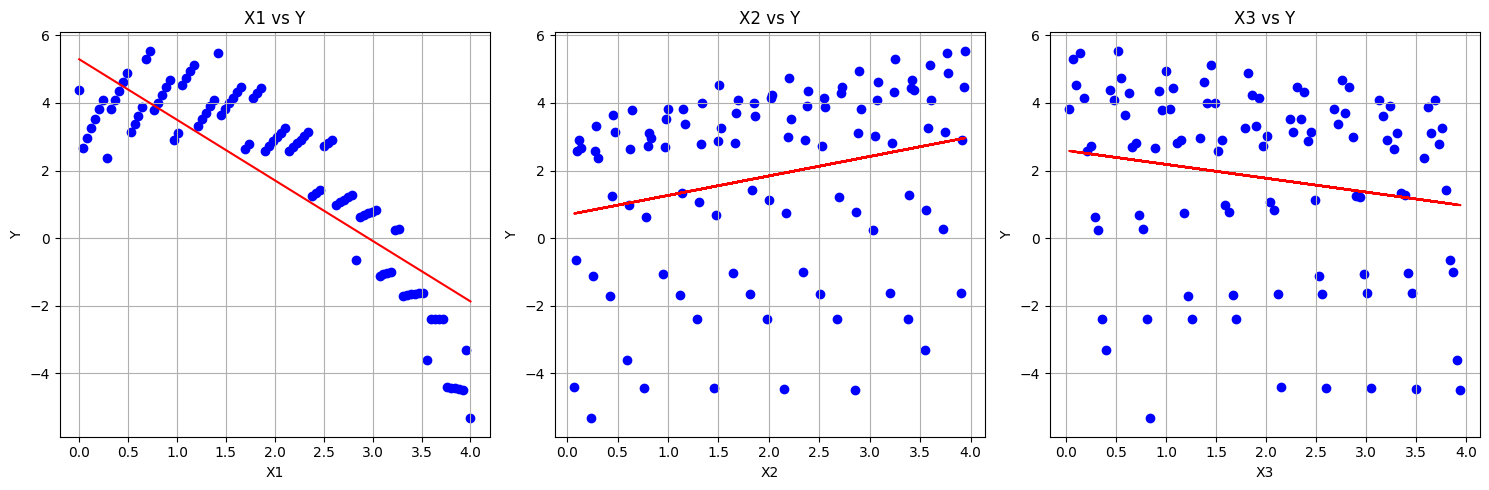

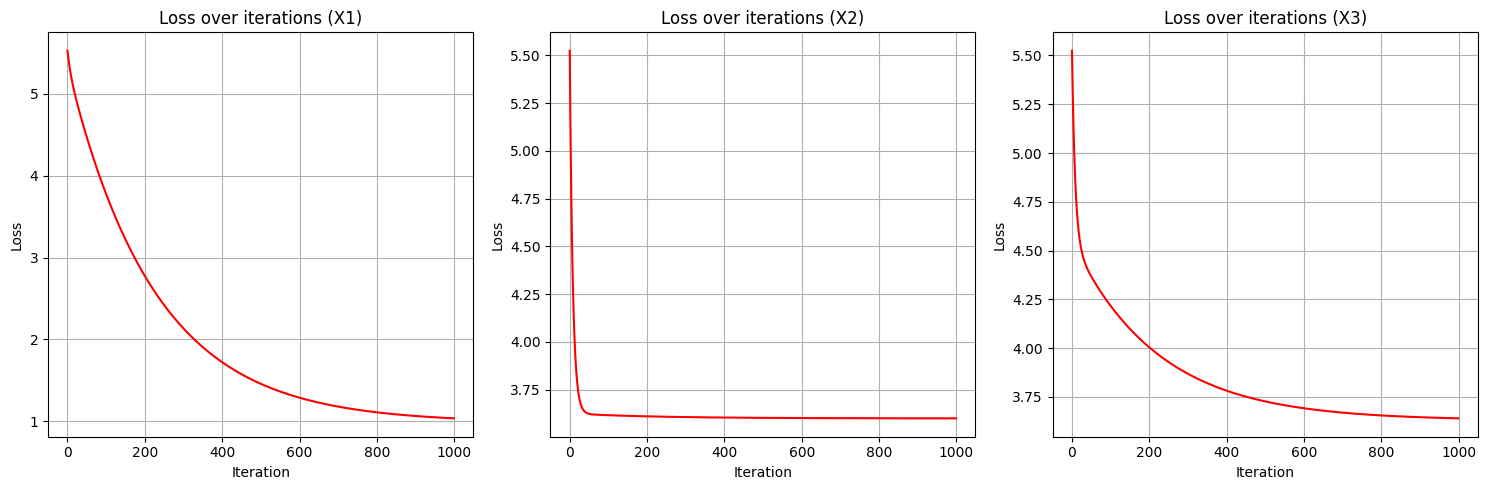

Final loss for X1: 1.0366648249472639
Final loss for X2: 3.599674193174967
Final loss for X3: 3.639706267299756
Final Theta for X1: -1.791190790033247
Final Theta for X2: 0.5766946227869245
Final Theta for X3: -0.4096513504177305
Final Intercept for X1: 5.2929472827573
Final Intercept for X2: 0.6870199464452038
Final Intercept for X3: 2.591186639666167


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('HW1.csv') #Read HW1.CSV
X1 = data.iloc[:, 0].values
X2 = data.iloc[:, 1].values
X3 = data.iloc[:, 2].values

Y = data.iloc[:, 3].values
# Gradient Descent Function
def gradient_descent(X, Y, learning_rate, iterations):
    m = len(Y)  # number of data points
    theta = 0   # Zero theta
    intercept = 0  #Zero intercepts
    losses = []  #Lists to store the loss at each iteration point


    for _ in range(iterations):
        y_pred = theta * X + intercept  # Predicted value
        loss = (1/(2*m)) * np.sum((y_pred - Y) ** 2)  #Mean squared error
        losses.append(loss)

        #Finding the gradients
        d_theta = (1/m) * np.sum((y_pred - Y) * X)
        d_intercept = (1/m) * np.sum(y_pred - Y)

        #   Updating theta and intercepts
        theta -= learning_rate * d_theta
        intercept -= learning_rate * d_intercept

    return theta, intercept, losses

   #  Training the models for each x variable

learning_rate = 0.01
iterations = 1000

theta1, intercept1, losses1 = gradient_descent(X1, Y, learning_rate, iterations)
theta2, intercept2, losses2 = gradient_descent(X2, Y, learning_rate, iterations)
theta3, intercept3, losses3 = gradient_descent(X3, Y, learning_rate, iterations)

#End training here

#Plotting begins
plt.figure(figsize=(15, 5))

#Scatter Plots for X1
plt.subplot(1, 3, 1)
plt.scatter(X1, Y, color='blue')  # Scatter plot of data points
plt.plot(X1, theta1 * X1 + intercept1, color='red')  # Regression line
plt.title('X1 vs Y')
plt.xlabel('X1')
plt.ylabel('Y')
plt.grid()


 # Scatter Plots for X2
plt.subplot(1, 3, 2)
plt.scatter(X2, Y, color='blue')
plt.plot(X2, theta2 * X2 + intercept2, color='red')
plt.title('X2 vs Y')
plt.xlabel('X2')
plt.ylabel('Y')
plt.grid()



# Scatter Plots for X3
plt.subplot(1, 3, 3)
plt.scatter(X3, Y, color='blue')
plt.plot(X3, theta3 * X3 + intercept3, color='red')
plt.title('X3 vs Y')
plt.xlabel('X3')
plt.ylabel('Y')
plt.grid()

plt.tight_layout()
plt.show()

# Plot "loss over iterations x#"
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(iterations), losses1, color='red')
plt.title('Loss over iterations (X1)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(range(iterations), losses2, color='red')
plt.title('Loss over iterations (X2)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(range(iterations), losses3, color='red')
plt.title('Loss over iterations (X3)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid()

plt.tight_layout()
plt.show()

#Compare the final losses/theta/intercepts
print(f'Final loss for X1: {losses1[-1]}')
print(f'Final loss for X2: {losses2[-1]}')
print(f'Final loss for X3: {losses3[-1]}')
print(f'Final Theta for X1: {theta1}')
print(f'Final Theta for X2: {theta2}')
print(f'Final Theta for X3: {theta3}')
print(f'Final Intercept for X1: {intercept1}')
print(f'Final Intercept for X2: {intercept2}')
print(f'Final Intercept for X3: {intercept3}')


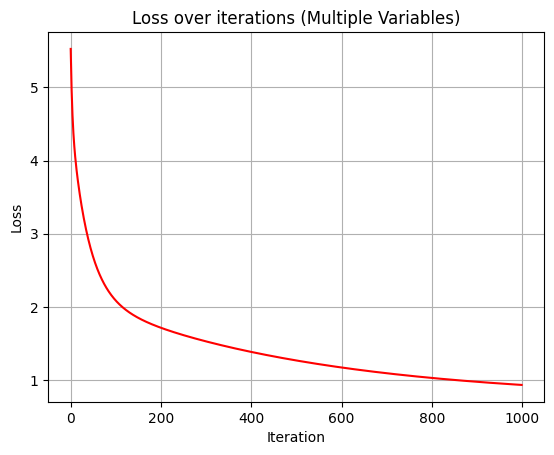

Final parameters: [-1.73320582  0.84898275  0.0150737 ]
Final intercept: 3.3992970512676273
Predictions for new values: [ 2.53014767 -0.0068198  -0.08728123]


In [ ]:
#Merge these guys... X1, X2, X3 into one matrix
X = np.column_stack((X1, X2, X3))
m = len(Y)  #Number of data points


# Gradient Descent Function for Merged Variables
def gradient_descent_multi(X, Y, learning_rate, iterations):
    n = X.shape[1]  #Number of features
    theta = np.zeros(n) #Zero theta
    intercept = 0 #Zero intercepts
    losses = []# losses stored


    for _ in range(iterations):
        y_pred = np.dot(X, theta) + intercept  # Predicted values
        loss = (1/(2*m)) * np.sum((y_pred - Y) ** 2)  #Mean squared error
        losses.append(loss)

         # Gradients
        d_theta = (1/m) * np.dot(X.T, (y_pred - Y))
        d_intercept = (1/m) * np.sum(y_pred - Y)

          # Update the parameters
        theta -= learning_rate * d_theta
        intercept -= learning_rate * d_intercept

    return theta, intercept, losses



# Train the model using all variables this time
theta, intercept, losses = gradient_descent_multi(X, Y, learning_rate, iterations)


#Plot loss over iterations
plt.plot(range(iterations), losses, color='red')
plt.title('Loss over iterations (Multiple Variables)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()


# Final Parameters printed
print(f'Final parameters: {theta}')
print(f'Final intercept: {intercept}')

# Prediction w/ print
def predict(X, theta, intercept):
    return np.dot(X, theta) + intercept

new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
predictions = predict(new_values, theta, intercept)

print(f'Predictions for new values: {predictions}')
